# Notebook_4 - The SIR and SEIR Models

### Import needed packages

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# let's set things up so we have nice font sizes
plt.rcParams.update({'font.size': 12})

### Goals

We want to explore numerical solutions to the SIR and SEIR models.

# An SIR Model
I've implemented the SIR equations in a simple (Euler) method. 

**Inputs**: 
- initial conditions (S0,I0,R0) 
- params (beta, gamma)
- t a vector of evenly spaced times that you want to integrate over

**Outputs**:
- A tuple of (S,I,R) at the time points in t

In [11]:
def SIR(initial_conditions, params, t):
    '''
    This function forward integrates a basic SIR model and returns S,I,R arrays.
    
    initial_conditions, a 3-tuple (S0, I0, R0) with initial counts in compartments
    params, a 2-tuple (beta,gamma) with parameters:
        beta, infection rate per S-I contact
        gamma, I->R recovery rate
    t, an array of timepoints, ASSUMED TO BE EQUALLY SPACED. 
    
    Returns a numpy array of S, I, and R arrays. 
    '''
    S0, I0, R0 = initial_conditions
    S, I, R = [S0], [I0], [R0]
    beta, gamma = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        St = S[-1] - (beta*S[-1]*I[-1])*dt
        It = I[-1] + (beta*S[-1]*I[-1] - gamma*I[-1])*dt
        Rt = R[-1] + (gamma*I[-1])*dt
        S.append(St)
        I.append(It)
        R.append(Rt)
    return S, I, R

### Set up parameters, initial conditions, and run the simulations

In [12]:
# Population size
N=1000

# Timesteps in days
t_max = 120
dt = 0.1
t = np.linspace(0, t_max, int(t_max/dt) + 1)

# SIR Parameters
# Infectiousness
beta = .3
# R0
R_0=5
# R0 = beta / gamma, so...  gamma = beta/R0
# Rate at which I -> R
gamma = beta / R_0
params = beta, gamma

In [13]:
# Initial Conditions
S0=1 - 10/N
I0=10/N
R0=0

# Run the simulation
results = SIR((S0,I0,R0), params, t)

### Plot Results

Text(0, 0.5, 'population fraction')

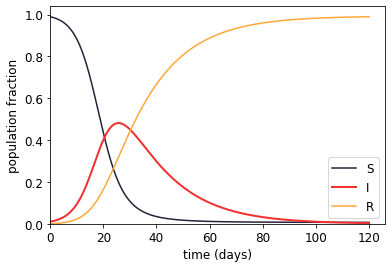

In [14]:
colors = {
    'S':'#22223B',
    'I':'#F13030',
    'R':'#FFA737'}

# Set up the axes
fig, ax = plt.subplots(nrows=1,ncols=1)
S,I,R = results
ax.plot(t,S,label='S',color=colors['S'])
ax.plot(t,I,label='I',color=colors['I'],linewidth=2)
ax.plot(t,R,label='R',color=colors['R'])

# Make the plot attractive
ax.legend(loc='best')
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_xlabel('time (days)')
ax.set_ylabel('population fraction')

# An SEIR Model
I've implemented the SEIR equations in a simple (Euler) method. 

**Inputs**: 
- initial conditions (S0,E0,I0,R0) 
- params (alpha, beta, gamma)
- t a vector of evenly spaced times that you want to integrate over

**Outputs**:
- A tuple of (S,E,I,R) at the time points in t

In [6]:
def SEIR(initial_conditions, params, t):
    '''
    This function forward integrates a basic SEIR model and returns S,E,I,R arrays.
    
    initial_conditions, a 4-tuple (S0, E0, I0, R0) with initial counts in compartments
    params, a 4-tuple (alpha,beta,gamma,rho) with parameters:
        alpha, E->I symptom onset rate
        beta, infection rate per S-I contact
        gamma, I->R recovery rate
        rho, social distancing parameter 0≤rho≤1
    t, an array of timepoints, ASSUMED TO BE EQUALLY SPACED. 
    
    Returns a numpy array of S, E, I, and R arrays. 
    '''
    S0, E0, I0, R0 = initial_conditions
    S, E, I, R = [S0], [E0], [I0], [R0]
    alpha, beta, gamma, rho = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        St = S[-1] - (beta*S[-1]*rho*I[-1])*dt
        Et = E[-1] + (beta*S[-1]*rho*I[-1] - alpha*E[-1])*dt
        It = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        Rt = R[-1] + (gamma*I[-1])*dt
        S.append(St)
        E.append(Et)
        I.append(It)
        R.append(Rt)
    return S, E, I, R

In [7]:
# Population size
N=1000

# Timesteps in days
t_max = 180
dt = 0.1
t = np.linspace(0, t_max, int(t_max/dt) + 1)

# SEIR Parameters
# Rate at which E -> I
alpha = .2
# Infectiousness
beta = 1
# R0
R_0=2
# R0 = beta / gamma, so...  gamma = beta/R0
# Rate at which I -> R
gamma = beta / R_0
rho = 1
params = alpha, beta, gamma, rho

rho = 0.8
params_socdist = alpha, beta, gamma, rho

In [8]:
# Initial Conditions
S0=1 - 1/N
E0=0
I0=1/N
R0=0

# Run the simulation
results = SEIR((S0,E0,I0,R0), params, t)
results_socdist = SEIR((S0,E0,I0,R0), params_socdist, t)

Text(0, 0.5, 'population fraction')

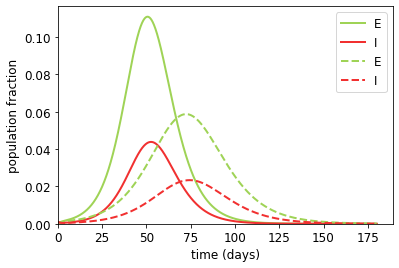

In [9]:
colors = {
    'S':'#22223B',
    'E':'#9FD356',
    'I':'#F13030',
    'R':'#FFA737'}

# Set up the axes
fig, ax = plt.subplots(nrows=1,ncols=1)
S,E,I,R = results
S_socdist,E_socdist,I_socdist,R_socdist = results_socdist
# CODE TO PLOT GOES HERE.
# ax.plot(t,S,label='S',color=colors['S'])
ax.plot(t,E,label='E',color=colors['E'],linewidth=2)
ax.plot(t,I,label='I',color=colors['I'],linewidth=2)
# ax.plot(t,R,label='R',color=colors['R'])

ax.plot(t,E_socdist,
        label='E',
        color=colors['E'],
        linewidth=2,
        ls='--')
ax.plot(t,I_socdist,
        label='I',
        color=colors['I'],
        linewidth=2, 
        ls='--')

# Make the plot attractive
ax.legend(loc='best')
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_xlabel('time (days)')
ax.set_ylabel('population fraction')